In [1]:
# Define sameple data (you'd import via read.delim() instead)
(my.data = data.frame(Plot=c("FF1", "FF1", "DB1", "DB1"), Type=c("FF", "FF", "DB", "DB"), Trial=c("1","2","1","2"), D1=1:4, D2=seq(10, by=5, length.out=4), D3=30:33))

Plot Type Trial D1 D2 D3
1 FF1  FF   1     1  10 30
2 FF1  FF   2     2  15 31
3 DB1  DB   1     3  20 32
4 DB1  DB   2     4  25 33

In [2]:
# Our custom col means; the input is a chunk of your data.frame with a particular Plot value (so same columns but fewer rows)
CustomColMeans = function(df)
{
    # Run colMeans over that part of our data, but only on the columns from D1 to D3 (others are not numeric)
    Means = colMeans(df[, which(names(df)=="D1"):which(names(df)=="D3")])
    # For the rest of the variables, take the first occurrence
    OtherCols = df[1, c("Plot", "Type")]
    # Merge the means with the other columns so we don't lose them.
    # Also we need to transpose Means with t(), so that it's treated as rows and not a column.
    # And add something to Trial indicate that the trial is actually the mean of the trials.
    Result = cbind(OtherCols, Trial="Mean", t(Means))
}

# Run the custom function, and turn the result into a data.frame using Reduce(rbind, ...)
(my.data.means = Reduce(rbind, by(my.data, my.data$Plot, CustomColMeans)))

Plot Type Trial D1  D2   D3  
3 DB1  DB   Mean  3.5 22.5 32.5
1 FF1  FF   Mean  1.5 12.5 30.5

In [3]:
# Merge our means with the original data
(my.data.combined = rbind(my.data, my.data.means))

Plot Type Trial D1  D2   D3  
1  FF1  FF   1     1.0 10.0 30.0
2  FF1  FF   2     2.0 15.0 31.0
3  DB1  DB   1     3.0 20.0 32.0
4  DB1  DB   2     4.0 25.0 33.0
31 DB1  DB   Mean  3.5 22.5 32.5
11 FF1  FF   Mean  1.5 12.5 30.5

In [4]:
# Make it into a long format
my.data.long = reshape2::melt(my.data.combined, variable.name="Depth", value.name="Resistance")
# Make depth numeric
my.data.long$Depth = substr(my.data.long$Depth, 2, 3)
# Check it
my.data.long

Using Plot, Type, Trial as id variables


Plot Type Trial Depth Resistance
1  FF1  FF   1     1      1.0      
2  FF1  FF   2     1      2.0      
3  DB1  DB   1     1      3.0      
4  DB1  DB   2     1      4.0      
5  DB1  DB   Mean  1      3.5      
6  FF1  FF   Mean  1      1.5      
7  FF1  FF   1     2     10.0      
8  FF1  FF   2     2     15.0      
9  DB1  DB   1     2     20.0      
10 DB1  DB   2     2     25.0      
11 DB1  DB   Mean  2     22.5      
12 FF1  FF   Mean  2     12.5      
13 FF1  FF   1     3     30.0      
14 FF1  FF   2     3     31.0      
15 DB1  DB   1     3     32.0      
16 DB1  DB   2     3     33.0      
17 DB1  DB   Mean  3     32.5      
18 FF1  FF   Mean  3     30.5

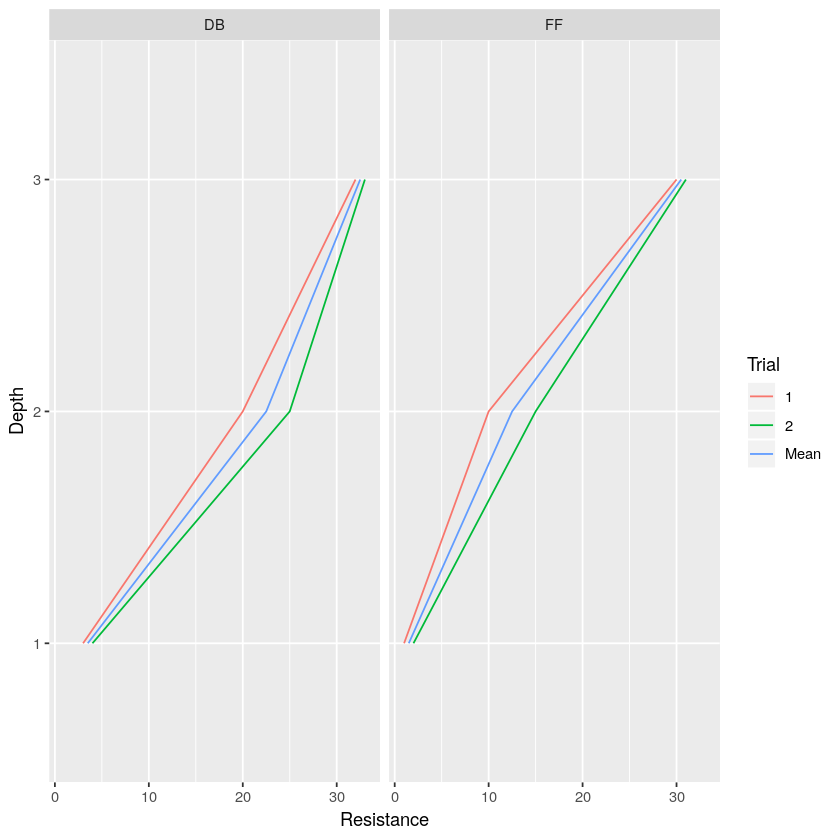

In [5]:
# Plot
library(ggplot2)
# "group" is necessary for geom_line() as well, for some reason it doesn't take them from colour
ggplot(my.data.long, aes(Resistance, Depth, colour=Trial, group=Trial)) + geom_line() + facet_wrap(vars(Type))